# Seção de Importação


In [128]:
#baixando o dataset de treino
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip



--2022-04-30 20:19:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   212MB/s    in 0.7s    

2022-04-30 20:19:57 (212 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [129]:
#baixando o dataset de teste
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip  -O /tmp/validation-horse-or-human.zip



--2022-04-30 20:19:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.23.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  34.3MB/s    in 0.3s    

2022-04-30 20:19:58 (34.3 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [130]:
import os
import zipfile

#extraindo o zip

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [131]:
#extraindo os arquivos para validação

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [132]:
# Diretorio com as imagens de treino de cavalos
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')


 
# Diretorio com as imagens de treino de humanos
train_human_dir = os.path.join('/tmp/horse-or-human/humans')


In [133]:
#Diretorio para os arquivos da validação

test_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
test_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

# Seção de visualização dos dados

In [134]:
#nomes dos arquivos
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse22-0.png', 'horse22-2.png', 'horse14-6.png', 'horse21-7.png', 'horse35-3.png', 'horse31-2.png', 'horse33-3.png', 'horse26-3.png', 'horse08-4.png', 'horse24-4.png']
['human04-19.png', 'human07-24.png', 'human10-08.png', 'human14-05.png', 'human14-24.png', 'human11-13.png', 'human04-05.png', 'human10-07.png', 'human03-23.png', 'human12-07.png']


In [135]:
test_horse_names = os.listdir(test_horse_dir)
print(test_horse_names[:10])
test_human_names = os.listdir(test_human_dir)
print(test_human_names[:10])

['horse5-018.png', 'horse2-412.png', 'horse1-568.png', 'horse6-064.png', 'horse5-100.png', 'horse6-089.png', 'horse2-224.png', 'horse3-011.png', 'horse4-530.png', 'horse1-127.png']
['valhuman03-10.png', 'valhuman05-06.png', 'valhuman04-19.png', 'valhuman01-10.png', 'valhuman02-01.png', 'valhuman02-20.png', 'valhuman04-06.png', 'valhuman02-04.png', 'valhuman01-07.png', 'valhuman05-21.png']


In [136]:
#total de imagens
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [137]:
print('total training horse images:', len(os.listdir(test_horse_dir)))
print('total training human images:', len(os.listdir(test_human_dir)))

total training horse images: 128
total training human images: 128


In [138]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parametros para o nosso gráfico
nrows = 4
ncols = 4
 

pic_index = 0

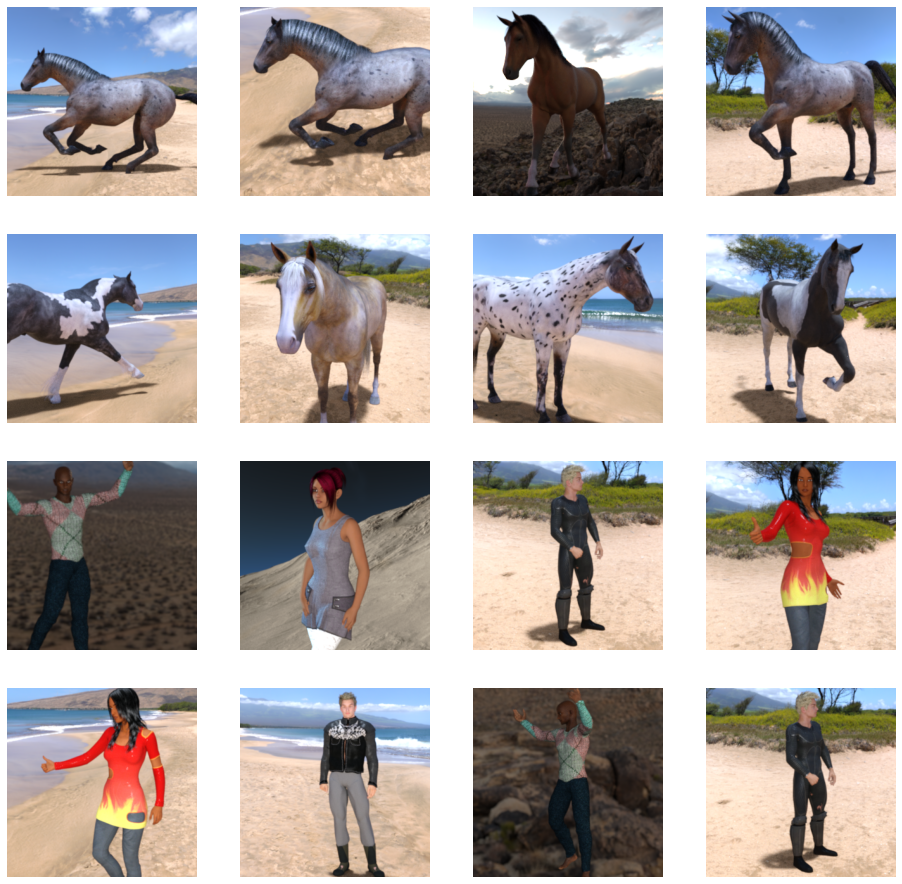

In [139]:
# Criação do gráfico
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()
 

# Seção de Treinamento

In [140]:
import tensorflow as tf

In [141]:
model = tf.keras.models.Sequential([

    # Primeira convolução
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Segunda convolução
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Terceira convolução
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Quarta convolução
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Quinta convolução
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Usamos apenas um neurônio como saída, sendo 0 para cavalos e 1 para humanos
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [142]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 35, 35, 64)      

In [143]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [144]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),  
        batch_size=128,
        
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [145]:
epochs_hist = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=30,
      verbose=1)

Epoch 1/30
8/8 [==============================] - 8s 843ms/step - loss: 1.0014 - accuracy: 0.5673
Epoch 2/30
8/8 [==============================] - 7s 842ms/step - loss: 0.7269 - accuracy: 0.6107
Epoch 3/30
8/8 [==============================] - 7s 845ms/step - loss: 0.7887 - accuracy: 0.6863
Epoch 4/30
8/8 [==============================] - 7s 845ms/step - loss: 0.4421 - accuracy: 0.8242
Epoch 5/30
8/8 [==============================] - 7s 845ms/step - loss: 0.2159 - accuracy: 0.9132
Epoch 6/30
8/8 [==============================] - 7s 851ms/step - loss: 0.2327 - accuracy: 0.9055
Epoch 7/30
8/8 [==============================] - 7s 852ms/step - loss: 0.7448 - accuracy: 0.8765
Epoch 8/30
8/8 [==============================] - 7s 841ms/step - loss: 0.3399 - accuracy: 0.8754
Epoch 9/30
8/8 [==============================] - 7s 858ms/step - loss: 0.2530 - accuracy: 0.9143
Epoch 10/30
8/8 [==============================] - 7s 848ms/step - loss: 0.0876 - accuracy: 0.9677
Epoch 11/30
8/8 [==

# Seção de Teste/Validação

In [146]:
import numpy as np
from keras.preprocessing import image


#uma função para testar o nosso dataset de testes
def pred_human_horse(model, horse_or_human):
  test_image = image.load_img(horse_or_human, target_size = (300, 300))
  test_image = image.img_to_array(test_image)/255
  test_image = np.expand_dims(test_image, axis = 0)

  result = model.predict(test_image).round(3)

  pred = np.argmax(result)
  print(horse_or_human,"--->", result)

  if result>0.5:
    print('Predicted>>> Human')
  else:
    print('Predicted>>> Horse')

In [147]:
import os

#Teste com cavalos
lista_val = [os.path.join(test_horse_dir, nome) for nome in os.listdir(test_horse_dir)]

for horse_or_human in lista_val:
  pred_human_horse(model, horse_or_human)

/tmp/validation-horse-or-human/horses/horse5-018.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse2-412.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/horses/horse1-568.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse6-064.png ---> [[0.543]]
Predicted>>> Human
/tmp/validation-horse-or-human/horses/horse5-100.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse6-089.png ---> [[0.996]]
Predicted>>> Human
/tmp/validation-horse-or-human/horses/horse2-224.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse3-011.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse4-530.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse1-127.png ---> [[0.]]
Predicted>>> Horse
/tmp/validation-horse-or-human/horses/horse3-521.png ---> [[0.898]]
Predicted>>> Human
/tmp/validation-horse-or-human/horses/horse3-099.png ---> [[0.]]
Pr

In [148]:
#Teste com humanos
lista_val = [os.path.join(test_human_dir, nome) for nome in os.listdir(test_human_dir)]

for horse_or_human in lista_val:
  pred_human_horse(model, horse_or_human)

/tmp/validation-horse-or-human/humans/valhuman03-10.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhuman05-06.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhuman04-19.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhuman01-10.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhuman02-01.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhuman02-20.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhuman04-06.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhuman02-04.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhuman01-07.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhuman05-21.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhuman03-13.png ---> [[1.]]
Predicted>>> Human
/tmp/validation-horse-or-human/humans/valhu

# Gráfico de Métricas de Desempenho

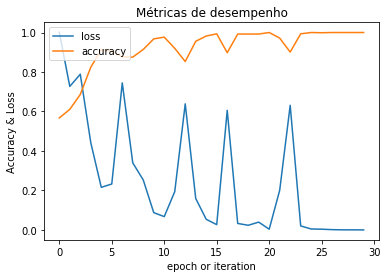

In [149]:
import pandas as pd

history_df = pd.DataFrame(epochs_hist.history)

history_df['loss'].plot();
history_df['accuracy'].plot();

plt.title('Métricas de desempenho')
plt.ylabel('Accuracy & Loss')
plt.xlabel('epoch or iteration')
plt.legend(["loss", 'accuracy'], loc = 'upper left')
plt.show()

# Features Extras Interessantes

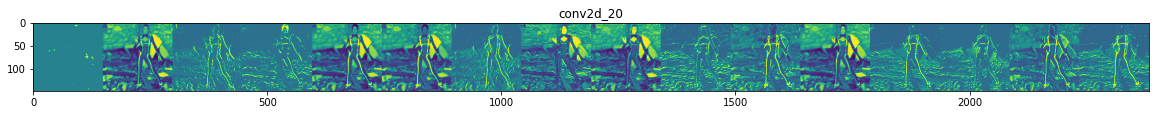

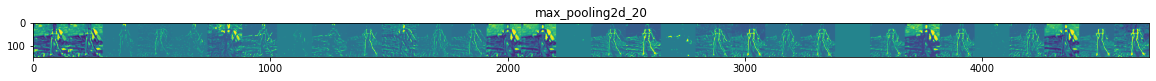

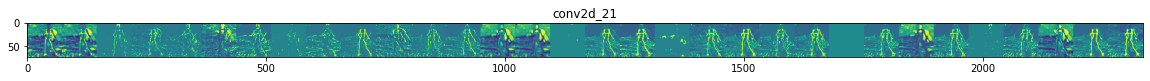

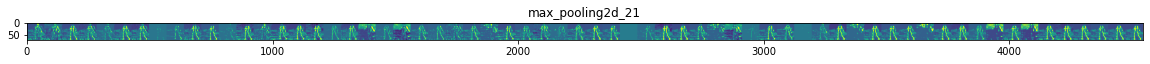

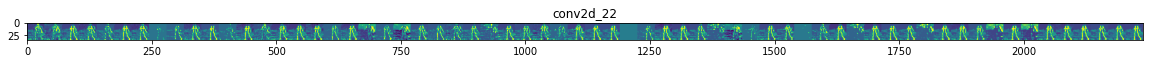

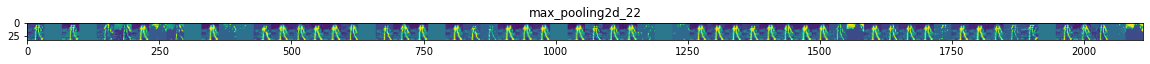

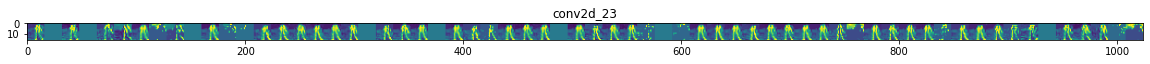

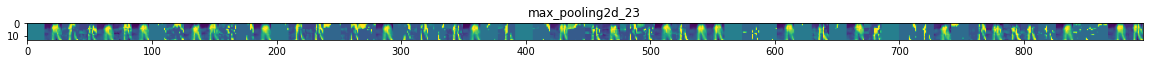

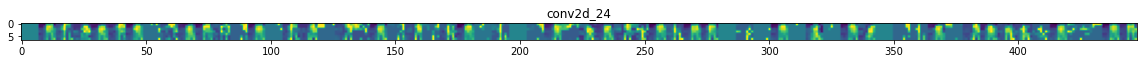

In [150]:
#Visualização das layers

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
 

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
 
img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
 

x /= 255
 

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
 

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    
    n_features = feature_map.shape[-1]  
    
    size = feature_map.shape[1]
    
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      
      display_grid[:, i * size : (i + 1) * size] = x
    
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [151]:
#teste passando um arquivo qualquer sem necessidade de alteração do código

import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse6-218.png to horse6-218 (1).png
[0.]
horse6-218.png is a horse
